<div class="alert alert-block alert-success">
    <h1 align="center"> K-Nearest Neighbors (Canser Dataset) </h1>
    <h3 align="center"><a href="https://github.com/amirhosein-ziaei">Amirhosein Ziaei</a></h3>
</div>

## What is K-Nearest Neighbor (KNN)?

K-Nearest Neighbors, or **KNN** for short, is one of the simplest machine learning algorithms and is used in a wide array of institutions. KNN is a `non-parametric`, `lazy learning` algorithm.

* When we say a technique is non-parametric, it means that it does not make any assumptions about the underlying data. In other words, it makes its selection based off of the proximity to other data points regardless of what feature the numerical values represent. 

* Being a lazy learning algorithm implies that there is little to no training phase. Therefore, we can immediately classify new data points as they present themselves.

> K-NN is a lazy learner because it doesn’t learn a discriminative function from the training data but “memorizes” the training dataset instead.
For example, the logistic regression algorithm learns its model weights (parameters) during training time. In contrast, there is no training time in K-NN.

**To summarize: An eager learner has a model fitting or training step. A lazy learner does not have a training phase.**

## Algorithm...

1.Initialize the K value.

2.Calculate the distance between test input and K trained nearest neighbors.

3.Check class categories of nearest neighbors and determine the type in which test input falls.

4.Classification will be done by taking the majority of votes.

5.Return the class category.

## Some pros and cons of KNN

> Pros:

* No assumptions about data
* Simple algorithm — easy to understand
* Can be used for classification and regression

> Cons:

* High memory requirement — All of the training data must be present in memory in order to calculate the closest K neighbors
* Sensitive to irrelevant features
* Sensitive to the scale of the data since we’re computing the distance to the closest K points

## *Importing Libraries*

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
warnings.filterwarnings('ignore')

## *Importing Dataset*

In [21]:
cancer = load_breast_cancer()

| Question      |Answer
| :---        |    :----:   
| Number of Instances      | 659       
| Number of Features   | 30
| Class Distribution      | 357 Benign, 212 Malignant
| Number of Missing Values      | 0       
| Number of Classes      | 2       
| Task   | Classification 

## *Exploratory Data Analysis and Visualization*

In [22]:
cancer.data.shape

(569, 30)

In [23]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [24]:
print(cancer.target_names)

['malignant' 'benign']


In [25]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [27]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, random_state=42)

In [28]:
print ("Shape of Train Data:", X_train.shape)
print ("Shape of Test Data:", X_test.shape)

Shape of Train Data: (426, 30)
Shape of Test Data: (143, 30)


In [29]:
y_train.shape

(426,)

<AxesSubplot:ylabel='count'>

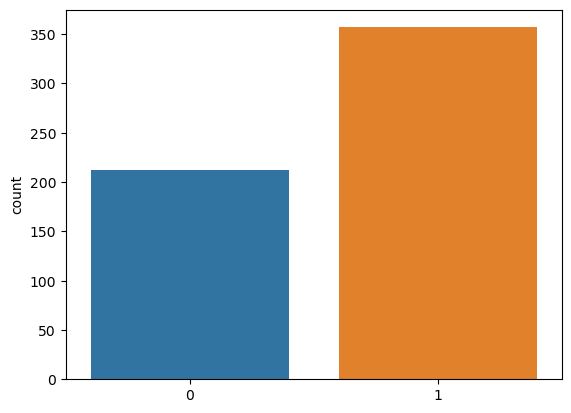

In [30]:
sns.countplot(cancer.target)

## *Train Model*

In [33]:
knn = KNeighborsClassifier()

In [34]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [35]:
y_pred = knn.predict(X_test)

In [36]:
knn.score(X_train, y_train)

0.9342723004694836

In [37]:
knn.score(X_test, y_test)

0.965034965034965

## *Evaluation Model*

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        54
           1       0.96      0.99      0.97        89

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



<AxesSubplot:>

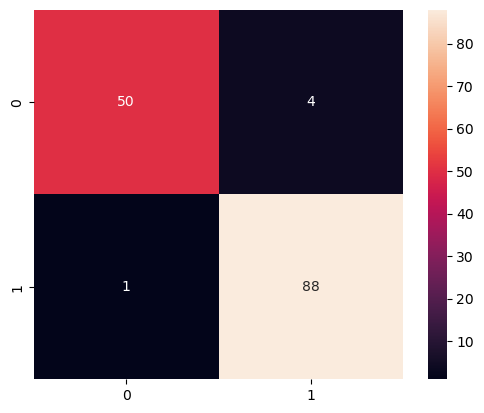

In [40]:
cm =confusion_matrix(y_test, y_pred)
sns.heatmap(cm, square=True , annot=True)

## *How to choose a K value?*

***K** value indicates the count of the nearest neighbors. We have to compute distances between test points and trained labels points. Updating distance metrics with every iteration is computationally expensive, and that’s why KNN is a lazy learning algorithm*

In [41]:
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

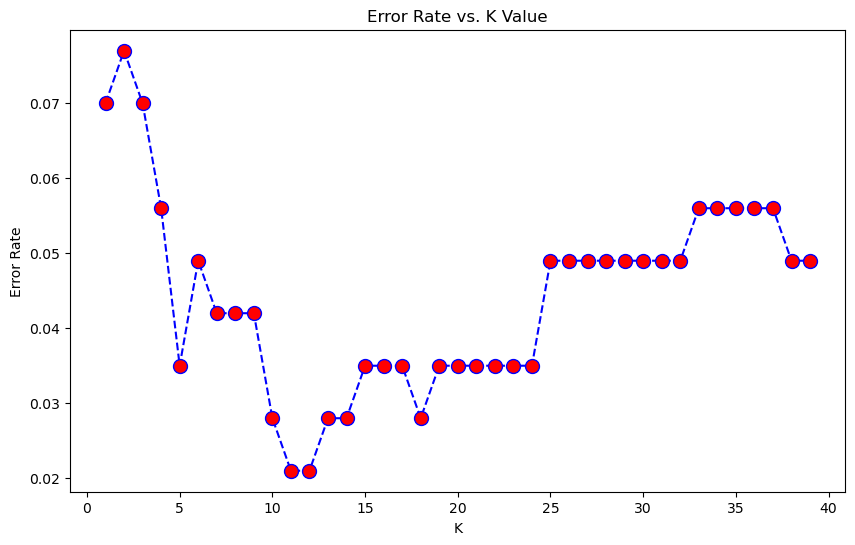

In [42]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## *Train Model with **k=11***

In [43]:
knn = KNeighborsClassifier(n_neighbors=11)

In [44]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [45]:
y_pred = knn.predict(X_test)

In [46]:
knn.score(X_train, y_train)

0.9342723004694836

In [48]:
knn.score(X_test, y_test)

0.9790209790209791